In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X = np.concatenate([X_train,X_test])
X.shape
Y = np.concatenate([y_train,y_test])

In [4]:
X = X / 255.0

In [5]:
class NetA:
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
class NetB:    
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(32,32,3)))
    model.add(layers.Dense(300, activation = 'relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) 

In [7]:
class NetC:
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(filters=25, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
nets = [NetA(), NetB(), NetC()]
histories = []
for net in nets:
    net_name = type(net).__name__
    print(f'==== Training {net_name} ====')
    history = net.model.fit(X, Y, validation_split=0.33, batch_size = 10 ,epochs=50, verbose=1)
    histories.append({
         'name': net_name,
         'net': net,
         'accs_history': history
            })

==== Training NetA ====
Epoch 1/50
4020/4020 [==============================] - 2s 535us/step - loss: 1.8641 - accuracy: 0.3715 - val_loss: 1.9299 - val_accuracy: 0.3584
Epoch 2/50
4020/4020 [==============================] - 2s 539us/step - loss: 1.8702 - accuracy: 0.3688 - val_loss: 2.0075 - val_accuracy: 0.3180
Epoch 3/50
4020/4020 [==============================] - 2s 530us/step - loss: 1.8562 - accuracy: 0.3726 - val_loss: 1.8471 - val_accuracy: 0.3717
Epoch 4/50
4020/4020 [==============================] - 2s 540us/step - loss: 1.8518 - accuracy: 0.3729 - val_loss: 2.0231 - val_accuracy: 0.3173
Epoch 5/50
4020/4020 [==============================] - 2s 531us/step - loss: 1.8507 - accuracy: 0.3764 - val_loss: 2.0685 - val_accuracy: 0.3053
Epoch 6/50
4020/4020 [==============================] - 2s 534us/step - loss: 1.8501 - accuracy: 0.3779 - val_loss: 1.8791 - val_accuracy: 0.3671
Epoch 7/50
4020/4020 [==============================] - 2s 524us/step - loss: 1.8431 - accuracy: 0.3

4020/4020 [==============================] - 5s 1ms/step - loss: 1.4679 - accuracy: 0.4808 - val_loss: 1.5158 - val_accuracy: 0.4617
Epoch 7/50
4020/4020 [==============================] - 5s 1ms/step - loss: 1.4369 - accuracy: 0.4924 - val_loss: 1.5126 - val_accuracy: 0.4694
Epoch 8/50
4020/4020 [==============================] - 6s 1ms/step - loss: 1.4088 - accuracy: 0.5034 - val_loss: 1.4691 - val_accuracy: 0.4795
Epoch 9/50
4020/4020 [==============================] - 5s 1ms/step - loss: 1.3829 - accuracy: 0.5074 - val_loss: 1.5143 - val_accuracy: 0.4672
Epoch 10/50
4020/4020 [==============================] - 5s 1ms/step - loss: 1.3606 - accuracy: 0.5175 - val_loss: 1.5969 - val_accuracy: 0.4381
Epoch 11/50
4020/4020 [==============================] - 5s 1ms/step - loss: 1.3398 - accuracy: 0.5276 - val_loss: 1.4915 - val_accuracy: 0.4780
Epoch 12/50
4020/4020 [==============================] - 6s 1ms/step - loss: 1.3227 - accuracy: 0.5307 - val_loss: 1.4599 - val_accuracy: 0.4876


4020/4020 [==============================] - 13s 3ms/step - loss: 0.5927 - accuracy: 0.7899 - val_loss: 1.4164 - val_accuracy: 0.6067
Epoch 13/50
4020/4020 [==============================] - 13s 3ms/step - loss: 0.5551 - accuracy: 0.8041 - val_loss: 1.5422 - val_accuracy: 0.6052
Epoch 14/50
4020/4020 [==============================] - 13s 3ms/step - loss: 0.5150 - accuracy: 0.8190 - val_loss: 1.5846 - val_accuracy: 0.5991
Epoch 15/50
4020/4020 [==============================] - 13s 3ms/step - loss: 0.4789 - accuracy: 0.8307 - val_loss: 1.6566 - val_accuracy: 0.5941
Epoch 16/50
4020/4020 [==============================] - 13s 3ms/step - loss: 0.4488 - accuracy: 0.8409 - val_loss: 1.8059 - val_accuracy: 0.5920
Epoch 17/50
4020/4020 [==============================] - 13s 3ms/step - loss: 0.4241 - accuracy: 0.8493 - val_loss: 1.9422 - val_accuracy: 0.5816
Epoch 18/50
4020/4020 [==============================] - 13s 3ms/step - loss: 0.3912 - accuracy: 0.8617 - val_loss: 2.0508 - val_accurac

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(list_history):
    for his in list_history:
        values = his['accs_history']
        plt.plot(values.history['accuracy'])
        plt.plot(values.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show() 

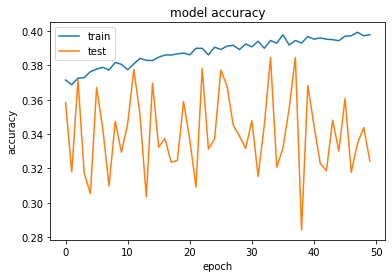

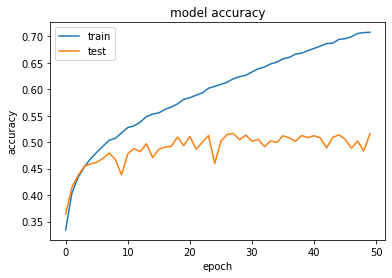

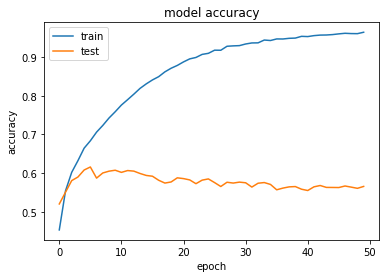

In [13]:
plot_history(histories)